In [111]:
import json
import matplotlib.pyplot as plt
import time
from collections import defaultdict, OrderedDict

In [60]:
path = 'Musical_Instruments.json'
file = open(path, encoding = 'utf8')

### Dataset Overview
Dataset source is from Amazon - it consists of reviews of musical instruments.

These are the following fields:
1. reviewerID - string - ID of reviewer
2. asin - string - ID of musical instrument
3. reivewerName - string - Name of reviewer
4. helpful - list - Helpfulness rating of the reviewer
5. reviewText - string - Text review of the musical instrument
6. overall - int - Overall rating of the musical instrument
7. summary - string - Summary of the review
8. unixReviewTime - int - Timestamp of review calculated against Unix Time
9. reviewTime - string - Timestamp of review in MM DD, YYYY format

In [61]:
# Reading in the data
data = []
for record in file:
    data.append(file.readline())

# In total there are 5131 records, but for some reason the last record is a blank
# This is causing json.loads() not to work, so we're gonna just manually filter out the last record
print(len(data)) 
data = data[0:5129]

5131


In [62]:
# Now we use json.loads() to parse the json records
data_clean = []
for record in data:
    data_clean.append(json.loads(record))

data_clean[0:2]

[{'reviewerID': 'A14VAT5EAX3D9S',
  'asin': '1384719342',
  'reviewerName': 'Jake',
  'helpful': [13, 14],
  'reviewText': "The product does exactly as it should and is quite affordable.I did not realized it was double screened until it arrived, so it was even better than I had expected.As an added bonus, one of the screens carries a small hint of the smell of an old grape candy I used to buy, so for reminiscent's sake, I cannot stop putting the pop filter next to my nose and smelling it after recording. :DIf you needed a pop filter, this will work just as well as the expensive ones, and it may even come with a pleasing aroma like mine did!Buy this product! :]",
  'overall': 5.0,
  'summary': 'Jake',
  'unixReviewTime': 1363392000,
  'reviewTime': '03 16, 2013'},
 {'reviewerID': 'A2C00NNG1ZQQG2',
  'asin': '1384719342',
  'reviewerName': 'RustyBill "Sunday Rocker"',
  'helpful': [0, 0],
  'reviewText': 'Nice windscreen protects my MXL mic and prevents pops. Only thing is that the goose

In [108]:
# Adding in a timeStuct field
for record in data_clean:
    record['timeStruct'] = time.strptime(record['reviewTime'], '%m %d, %Y')

data_clean[0:2]   

[{'reviewerID': 'A14VAT5EAX3D9S',
  'asin': '1384719342',
  'reviewerName': 'Jake',
  'helpful': [13, 14],
  'reviewText': "The product does exactly as it should and is quite affordable.I did not realized it was double screened until it arrived, so it was even better than I had expected.As an added bonus, one of the screens carries a small hint of the smell of an old grape candy I used to buy, so for reminiscent's sake, I cannot stop putting the pop filter next to my nose and smelling it after recording. :DIf you needed a pop filter, this will work just as well as the expensive ones, and it may even come with a pleasing aroma like mine did!Buy this product! :]",
  'overall': 5.0,
  'summary': 'Jake',
  'unixReviewTime': 1363392000,
  'reviewTime': '03 16, 2013',
  'timeStruct': time.struct_time(tm_year=2013, tm_mon=3, tm_mday=16, tm_hour=0, tm_min=0, tm_sec=0, tm_wday=5, tm_yday=75, tm_isdst=-1)},
 {'reviewerID': 'A2C00NNG1ZQQG2',
  'asin': '1384719342',
  'reviewerName': 'RustyBill "S

In [109]:
# Adding in a day field

for record in data_clean:
    record['day'] = record['timeStruct'].tm_wday
    
data_clean[0:2] 

[{'reviewerID': 'A14VAT5EAX3D9S',
  'asin': '1384719342',
  'reviewerName': 'Jake',
  'helpful': [13, 14],
  'reviewText': "The product does exactly as it should and is quite affordable.I did not realized it was double screened until it arrived, so it was even better than I had expected.As an added bonus, one of the screens carries a small hint of the smell of an old grape candy I used to buy, so for reminiscent's sake, I cannot stop putting the pop filter next to my nose and smelling it after recording. :DIf you needed a pop filter, this will work just as well as the expensive ones, and it may even come with a pleasing aroma like mine did!Buy this product! :]",
  'overall': 5.0,
  'summary': 'Jake',
  'unixReviewTime': 1363392000,
  'reviewTime': '03 16, 2013',
  'timeStruct': time.struct_time(tm_year=2013, tm_mon=3, tm_mday=16, tm_hour=0, tm_min=0, tm_sec=0, tm_wday=5, tm_yday=75, tm_isdst=-1),
  'day': 5},
 {'reviewerID': 'A2C00NNG1ZQQG2',
  'asin': '1384719342',
  'reviewerName': '

In [113]:
# Adding in a month field

for record in data_clean:
    record['month'] = record['timeStruct'].tm_mon
    
data_clean[0:2] 

[{'reviewerID': 'A14VAT5EAX3D9S',
  'asin': '1384719342',
  'reviewerName': 'Jake',
  'helpful': [13, 14],
  'reviewText': "The product does exactly as it should and is quite affordable.I did not realized it was double screened until it arrived, so it was even better than I had expected.As an added bonus, one of the screens carries a small hint of the smell of an old grape candy I used to buy, so for reminiscent's sake, I cannot stop putting the pop filter next to my nose and smelling it after recording. :DIf you needed a pop filter, this will work just as well as the expensive ones, and it may even come with a pleasing aroma like mine did!Buy this product! :]",
  'overall': 5.0,
  'summary': 'Jake',
  'unixReviewTime': 1363392000,
  'reviewTime': '03 16, 2013',
  'timeStruct': time.struct_time(tm_year=2013, tm_mon=3, tm_mday=16, tm_hour=0, tm_min=0, tm_sec=0, tm_wday=5, tm_yday=75, tm_isdst=-1),
  'day': 5,
  'month': 3},
 {'reviewerID': 'A2C00NNG1ZQQG2',
  'asin': '1384719342',
  're

### Some Simple Statistics

In [92]:
# Average score of all reviews
total_score = 0
for record in data_clean:
    total_score += int(record['overall'])

average_score = total_score / len(data_clean)
print('Average Score: ', average_score)

Average Score:  4.493078572821212


In [96]:
# Find total number of unique product IDs
# Use a set to do a unique count
unq_product_id = set()

# Iterate through each record, add every unique record to the set
for record in data_clean:
    unq_product_id.add(record['asin'])
    
total_unq_product_id = len(unq_product_id)
print('Total Number of Unique Products: ', total_unq_product_id)

Total Number of Unique Products:  900


In [97]:
# Find total number of unique Reviewer IDs
# Use a set to do a unique count
unq_reviewer_id = set()

# Iterate through each record, add every unique record to the set
for record in data_clean:
    unq_reviewer_id.add(record['reviewerID'])
    
total_unq_reviewer_id = len(unq_reviewer_id)
print('Total Number of Unique Reviewers: ', total_unq_reviewer_id)

Total Number of Unique Reviewers:  1407


In [102]:
# Check the average number of reviews done per ReviewID
avg_review_per_reviewID = len(data_clean) / total_unq_reviewer_id

print('Average Reviews per Reviewer: ', avg_review_per_reviewID)

Average Reviews per Reviewer:  3.6453447050461976


In [100]:
# Do a count on number of reviews done by each Reviewer ID
# Check the top 10 reviewers
review_count_per_reviewerID = defaultdict(int)

# Iterate through each record, perform a count on the number of reviews done per reviewer
for record in data_clean:
    review_count_per_reviewerID[record['reviewerID']] += 1

top_10_reviewers = []
for key, value in review_count_per_reviewerID.items():
    top_10_reviewers.append((value, key))
    
top_10_reviewers.sort()
top_10_reviewers[-10:]

[(13, 'A3M1PLEYNDEYO8'),
 (14, 'A34O0KQV4QXWNQ'),
 (14, 'A781ITP3HE2N5'),
 (16, 'A1MVH1WLYDHZ49'),
 (16, 'A2EZWZ8MBEDOLN'),
 (17, 'A1L7M2JXN4EZCR'),
 (18, 'A15TYOEWBQYF0X'),
 (18, 'A1SD1C8XK3Z3V1'),
 (19, 'A1DVUFG2QSJ6IK'),
 (24, 'ADH0O8UVJOT10')]

In [112]:
# Count number of reviews done per day
reviews_per_day = defaultdict(int)

for record in data_clean:
    reviews_per_day[record['day']] += 1

# Using an ordered dict to sort the dictionary according to days
# We can see that most of the reviews seem to be done mid-week
reviews_per_day = OrderedDict(sorted(reviews_per_day.items()))
reviews_per_day

OrderedDict([(0, 769),
             (1, 716),
             (2, 824),
             (3, 784),
             (4, 816),
             (5, 595),
             (6, 625)])

In [114]:
# Count number of reviews done per month
reviews_per_mth = defaultdict(int)

for record in data_clean:
    reviews_per_mth[record['month']] += 1

# Using an ordered dict to sort the dictionary according to months
# We can see that most of the reviews seem to be done end of the year to start
reviews_per_mth = OrderedDict(sorted(reviews_per_mth.items()))
reviews_per_mth

OrderedDict([(1, 636),
             (2, 500),
             (3, 504),
             (4, 425),
             (5, 442),
             (6, 426),
             (7, 362),
             (8, 342),
             (9, 285),
             (10, 323),
             (11, 365),
             (12, 519)])

### Calculate Average Score of Review by Product ID

In [76]:
# First we count the number of products for each product ID
product_count = defaultdict(int)
for record in data_clean:
    product_count[record['asin']] += 1

# Then we create a defaultdict to store the average score
# Then for every record, we cummulatively add score / total number of product ID to the average score dictionary
avg_score = defaultdict(int)
for record in data_clean:
    product_id = record['asin']
    score = record['overall']
    avg_score[product_id] += score / product_count[product_id]

# Next, we create a list
# Then iterate through the default dict to store the scores in a list of tuples [(avg_score1, product_id1), ....]
avg_score_list = []
for key, value in avg_score.items():
    avg_score_list.append((value, key))

# Sort the list of tuples
# Take last 10 records for top 10
avg_score_list.sort()
avg_score_list[-10:]

[(5.0, 'B00AHEWBM4'),
 (5.0, 'B00BHJNC4E'),
 (5.0, 'B00BKXN9LS'),
 (5.0, 'B00BL6IYW8'),
 (5.0, 'B00BTGMI5O'),
 (5.0, 'B00C5B20QE'),
 (5.0, 'B00CDA0IUC'),
 (5.0, 'B00CK2FOZM'),
 (5.0, 'B00EPWAQS0'),
 (5.0, 'B00HFRXACG')]

In [89]:
# Since all the top 10 scores are 5.0, its not really meaningful
# Let's try to make it such that only products with 20 or more reviews are considered
avg_score_20min = defaultdict(int)

# Same logic as above, except we only add it into the dict if count is 20 and above
for record in data_clean:
    product_id = record['asin']
    score = record['overall']
    if product_count[product_id] >= 20:
        avg_score_20min[product_id] += score / product_count[product_id]
        
avg_score_20min_list = []
for key, value in avg_score_20min.items():
    avg_score_20min_list.append((value, key))
    
avg_score_20min_list.sort()
avg_score_20min_list[-10:]

[(4.638888888888889, 'B0006NDF8A'),
 (4.6521739130434785, 'B000RNB720'),
 (4.6585365853658525, 'B003VWJ2K8'),
 (4.666666666666664, 'B003VWKPHC'),
 (4.673913043478262, 'B0002H0A3S'),
 (4.73913043478261, 'B0002M6CVC'),
 (4.75, 'B0002D0E8S'),
 (4.826086956521739, 'B0002E2XCW'),
 (4.857142857142857, 'B0002D0CEO'),
 (4.870967741935482, 'B00646MZHK')]

### Calculate Average Score of Review by Day

In [117]:
# First create a defaultdict to store the average scores per day
avg_score_day = defaultdict(int)

# Iterate through the data, for every record, cummulative add score / total number of reviews per day
for record in data_clean:
    day = record['day']
    score = record['overall']
    
    avg_score_day[day] += score / reviews_per_day[day]

# Using an ordered dict to sort the scores by day
avg_score_day = OrderedDict(sorted(avg_score_day.items()))
avg_score_day

OrderedDict([(0, 4.507152145643669),
             (1, 4.495810055865924),
             (2, 4.533980582524332),
             (3, 4.437500000000011),
             (4, 4.4791666666667025),
             (5, 4.5159663865546085),
             (6, 4.484800000000011)])

### Calculate Average Score of Review by Month

In [118]:
# First create a defaultdict to store the average scores per month
avg_score_mth = defaultdict(int)

# Iterate through the data, for every record, cummulative add score / total number of reviews per month
for record in data_clean:
    month = record['month']
    score = record['overall']
    
    avg_score_mth[month] += score / reviews_per_mth[month]

# Using an ordered dict to sort the scores by month
avg_score_mth = OrderedDict(sorted(avg_score_mth.items()))
avg_score_mth

OrderedDict([(1, 4.462264150943415),
             (2, 4.507999999999959),
             (3, 4.47817460317461),
             (4, 4.505882352941161),
             (5, 4.488687782805417),
             (6, 4.401408450704239),
             (7, 4.519337016574585),
             (8, 4.599415204678369),
             (9, 4.5122807017543884),
             (10, 4.433436532507765),
             (11, 4.5068493150684965),
             (12, 4.527938342967245)])

### Visualizations

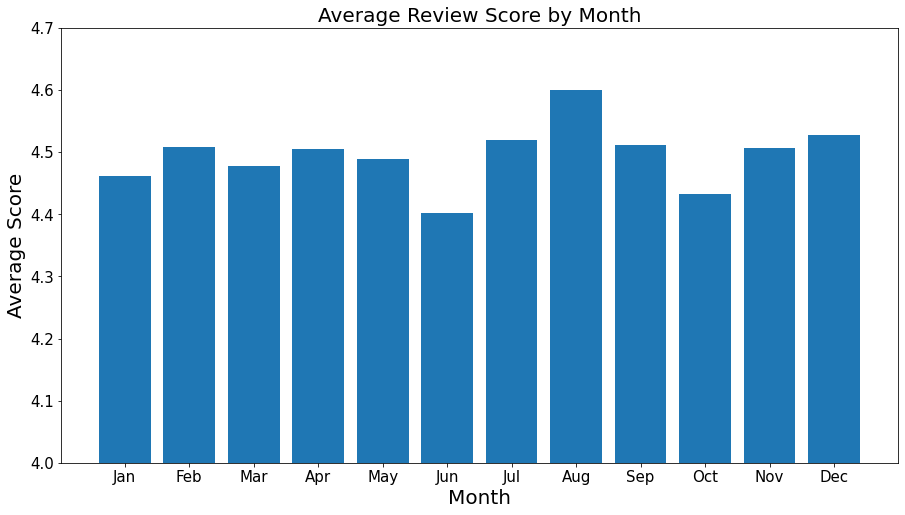

In [138]:
month = []
score = []

for key, value in avg_score_mth.items():
    month.append(key)
    score.append(value)
    
plt.figure(figsize=(15,8))
plt.ylim(4.0, 4.7)
plt.xticks(month, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], size=15)
plt.yticks(size=15)
plt.title('Average Review Score by Month', size=20)
plt.xlabel('Month', size=20)
plt.ylabel('Average Score', size=20)
plt.bar(month, score)
plt.show()

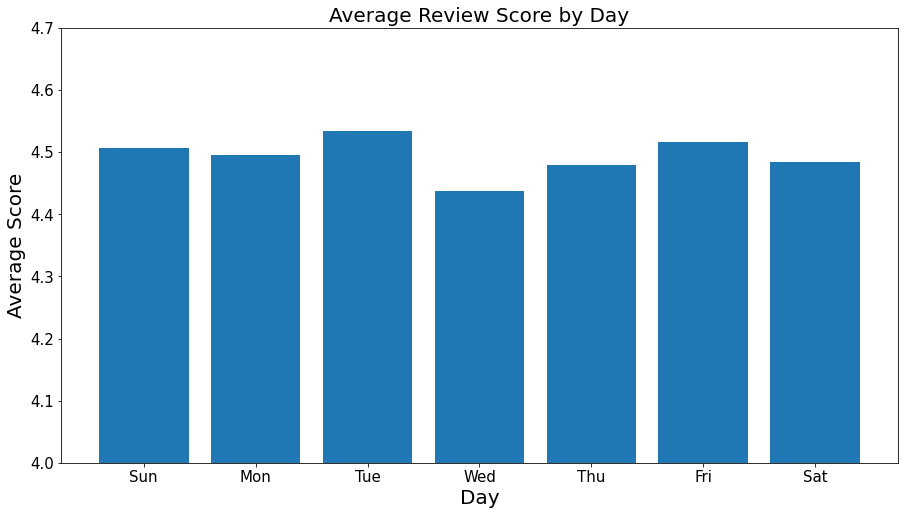

In [143]:
day = []
score = []

for key, value in avg_score_day.items():
    day.append(key)
    score.append(value)
    
plt.figure(figsize=(15,8))
plt.ylim(4.0, 4.7)
plt.xticks(day, ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'], size=15)
plt.yticks(size=15)
plt.title('Average Review Score by Day', size=20)
plt.xlabel('Day', size=20)
plt.ylabel('Average Score', size=20)
plt.bar(day, score)
plt.show()

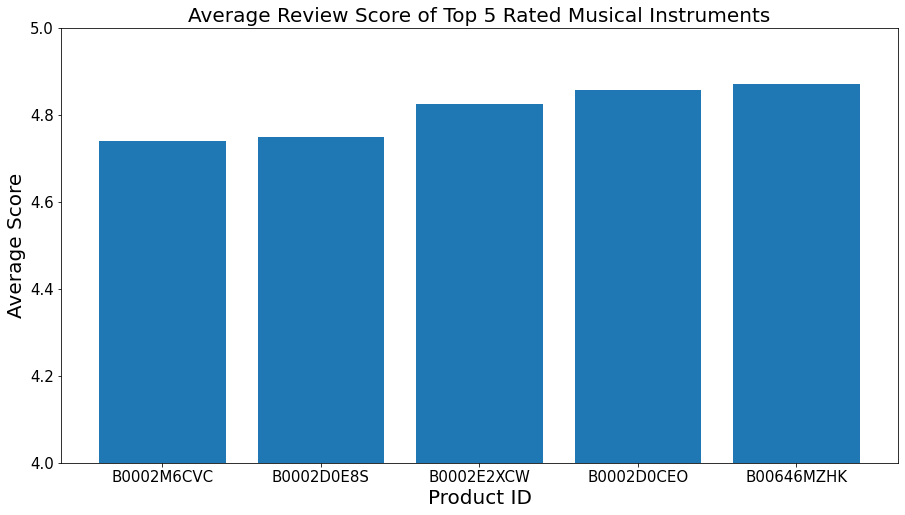

In [154]:
top_5_products = avg_score_20min_list[-5:]

productID = []
score = []

for record in top_5_products:
    productID.append(record[1])
    score.append(record[0])
    
plt.figure(figsize=(15,8))
plt.ylim(4.0, 5)
plt.xticks(size=15)
plt.yticks(size=15)
plt.title('Average Review Score of Top 5 Rated Musical Instruments', size=20)
plt.xlabel('Product ID', size=20)
plt.ylabel('Average Score', size=20)
plt.bar(productID, score)
plt.show()